#Batch gradient

In [36]:

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import random


In [66]:
data = pd.read_csv("/content/drive/MyDrive/DL notebooks/homeprices_banglore.csv")
data.head(10)
data.sample(5)

,area,bedrooms,price
7,3300,4,155.0
6,2732,4,135.0
12,1000,2,38.0
10,1800,3,82.0
15,1175,2,42.0


##Scaleing our fetures and traget values.

In [8]:

sx = MinMaxScaler()
sy = MinMaxScaler()

x_scaled = sx.fit_transform(data.drop('price',axis='columns'))
x_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [10]:
y_scaled = sy.fit_transform(data['price'].values.reshape(data.shape[0],1))
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

##Trials of formulas and concept which use in function

In [17]:
w = np.ones(shape=(2))

In [14]:
x_scaled.shape[0]

20

In [19]:
x_scaled.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [18]:
np.dot(w,x_scaled.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [23]:
a = np.array([2,4,6])
b = np.array([10,9,8])
np.mean(np.square(b-a))

31.0

#"Defining a batch gradient descent function"



In [27]:
def batch_gradiant_decent(x,y_true,epochs,learning_rate=0.01):
  n = x.shape[1]
  w = np.ones(shape=(n))
  b = 0
  tot_sam = x.shape[0]

  loss_list = []
  epoch_list = []
  for i in range(epochs):
    y_predicted = np.dot(w,x.T) + b

    w_grad = -(2/tot_sam)*(x.T.dot(y_true-y_predicted))
    b_grad = -(2/tot_sam)*np.sum(y_true-y_predicted)

    w  = w - learning_rate*w_grad
    b  = b - learning_rate*b_grad

    loss = np.mean(np.square(y_true-y_predicted))

    if i%10==0:
      loss_list.append(loss)
      epoch_list.append(i)
      print(f'epoch:{i},w:{w},b:{b},loss:{loss}')

  return w,b,loss_list,epoch_list






In [67]:
w,b,loss_list,epoch_list = batch_gradiant_decent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),2000 )

epoch:0,w:[0.99551317 0.99445655],b:-0.009603223499361428,loss:0.2768777174681
epoch:10,w:[0.95630831 0.94626642],b:-0.09163530752945695,loss:0.16573507027671064
epoch:20,w:[0.92561534 0.90895369],b:-0.1526797697123304,loss:0.10212908135956808
epoch:30,w:[0.9013738  0.87987065],b:-0.19789162051248474,loss:0.06564235879682481
epoch:40,w:[0.88202714 0.8570175 ],b:-0.23116355287977375,loss:0.04463022365578522
epoch:50,w:[0.86639945 0.8388837 ],b:-0.2554349736249456,loss:0.03245122421764872
epoch:60,w:[0.85360224 0.82432823],b:-0.27292538144121864,loss:0.025317339083010492
epoch:70,w:[0.8429641  0.81248913],b:-0.2853106120900698,loss:0.021067914076635823
epoch:80,w:[0.83397757 0.80271516],b:-0.2938559373058315,loss:0.01847041893523527
epoch:90,w:[0.826259   0.79451428],b:-0.2995165799588363,loss:0.016821657535428185
epoch:100,w:[0.81951826 0.78751463],b:-0.30301362222683875,loss:0.015720331469182485
epoch:110,w:[0.81353584 0.78143512],b:-0.3048913307554715,loss:0.014937329116527901
epoch:1

#"Plotting a graph of the number of epochs against the loss at each epoch."

Text(0, 0.5, 'loss')

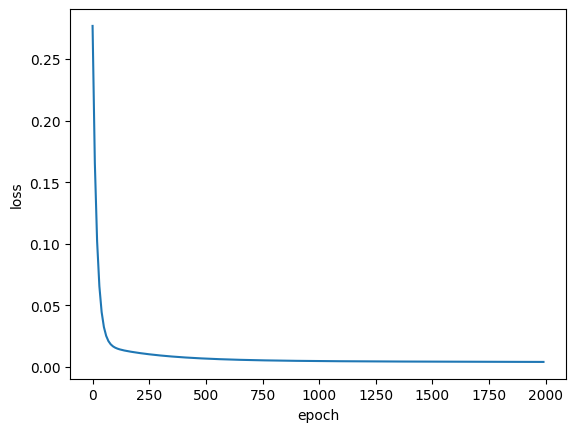

In [68]:
plt.plot(epoch_list,loss_list)
plt.xlabel('epoch')
plt.ylabel('loss')

##Defining prediction function

In [69]:
def prediction(area, bedrooms,w,b):
  x_scaled = sx.transform([[area, bedrooms]])[0]
  scaled_price = w[0] * x_scaled[0] + w[1] * x_scaled[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]

prediction(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


122.87866071742575

In [70]:
prediction(1200,2,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


43.108551172474385

#"Stochastic Gradient Descent"

In [52]:
def  Stochastic_gradiant_decent(x,y_true,epochs,learning_rate=0.01):
  n = x.shape[1]
  w = np.ones(shape=(n))
  b = 0
  tot_sam = x.shape[0]

  sgd_loss_list = []
  sgd_epoch_list = []
  for i in range(epochs):

    random_ind = random.randint(0,tot_sam-1)

    sample_x = x[random_ind]
    sample_y = y_true[random_ind]

    y_predicted = np.dot(w,sample_x.T) + b

    w_grad = -(2/tot_sam)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/tot_sam)*np.sum(sample_y-y_predicted)

    w  = w - learning_rate*w_grad
    b  = b - learning_rate*b_grad

    sgd_loss = np.mean(np.square(sample_y-y_predicted))

    if i%10==0:
      sgd_loss_list.append(sgd_loss)
      sgd_epoch_list.append(i)
      print(f'epoch:{i},w:{w},b:{b},loss:{sgd_loss}')

  return w,b,sgd_loss_list,sgd_epoch_list



In [55]:
w,b,sgd_loss_list,sgd_epoch_list = Stochastic_gradiant_decent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),2000)

epoch:0,w:[0.99989307 0.99978495],b:-0.00043010217113665386,loss:0.18498787761646346
epoch:10,w:[0.99753356 0.99680094],b:-0.005680699303598287,loss:0.5049680128461649
epoch:20,w:[0.99530458 0.99385746],b:-0.010243925911831287,loss:0.0001051482093575943
epoch:30,w:[0.99306086 0.99113073],b:-0.015101159408010188,loss:0.4065764706128224
epoch:40,w:[0.9906736 0.9885913],b:-0.019254885469215277,loss:0.07965252952613561
epoch:50,w:[0.98872068 0.98633135],b:-0.023657703176586727,loss:0.23151077307558124
epoch:60,w:[0.98647475 0.98378466],b:-0.028327388819410774,loss:0.892583387274168
epoch:70,w:[0.9845395  0.98175896],b:-0.03220130453203419,loss:0.3354663636245899
epoch:80,w:[0.98222158 0.9790283 ],b:-0.036779391943772805,loss:0.06822382475391298
epoch:90,w:[0.98042452 0.97672241],b:-0.04099601415934924,loss:0.0016840395720581073
epoch:100,w:[0.97872382 0.97427777],b:-0.045542809047003516,loss:0.19003865042364115
epoch:110,w:[0.97813895 0.97306262],b:-0.04867012735979593,loss:0.2310532642284

Text(0, 0.5, 'sgd_loss')

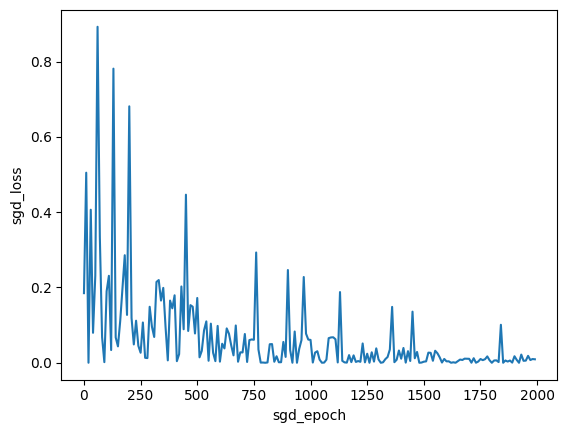

In [56]:
plt.plot(sgd_epoch_list,sgd_loss_list)
plt.xlabel('sgd_epoch')
plt.ylabel('sgd_loss')

In [63]:
def prediction(area, bedrooms,w,b):
  x_scaled = sx.transform([[area, bedrooms]])[0]
  scaled_price = w[0] * x_scaled[0] + w[1] * x_scaled[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]

prediction(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


139.6009810078498

In [64]:
prediction(1200,2,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


32.75997685238827